In [ ]:
!nvidia-smi

Wed Sep  4 17:43:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 23.7 MB/s eta 0:00:00


In [ ]:
import cv2
import os
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 771, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'track', 'val', 'export', 'predict', 'train', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'pose', 'detect', 'segment'}
                MODE (required) is one of {'track', 'val', 'export', 'predict', 'train', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="M9buI2U8yZ7pLqstU4cc")
project = rf.workspace("t5-3pals").project("drowsiness-detection-0t0rn")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Drowsiness-Detection-1/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 136MB/s]
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Drowsiness-Detection-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

In [ ]:
# Run predictions on new images
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source="/content/Drowsiness-Detection-1/test/images"

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/7 /content/Drowsiness-Detection-1/test/images/P1042777_720_mp4-0003_jpg.rf.afd162ded4b941b7c136ba9d6c0860a2.jpg: 640x640 1 Normal, 37.0ms
image 2/7 /content/Drowsiness-Detection-1/test/images/P1042777_720_mp4-0005_jpg.rf.7a77e8e50fa98ba1d81ca6ab3659c1c3.jpg: 640x640 1 Sleep, 37.1ms
image 3/7 /content/Drowsiness-Detection-1/test/images/P1042777_720_mp4-0008_jpg.rf.b5722fd0896a82dcac7b8807c095663a.jpg: 640x640 1 Normal, 37.0ms
image 4/7 /content/Drowsiness-Detection-1/test/images/P1042777_720_mp4-0009_jpg.rf.3c7603124f2a5da6d9918edc873b955b.jpg: 640x640 1 Normal, 37.0ms
image 5/7 /content/Drowsiness-Detection-1/test/images/P1042777_720_mp4-0012_jpg.rf.8bc3bb3f7881ff9d56331896c2a57271.jpg: 640x640 1 Normal, 37.1ms
image 6/7 /content/Drowsiness-Detection-1/test/images/P1043066_720_mp4-0000_jpg.rf.84b4bc52b65c15146

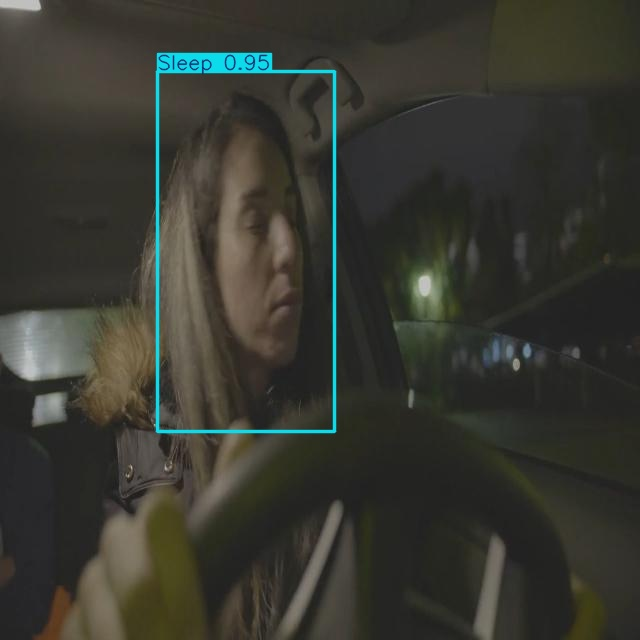

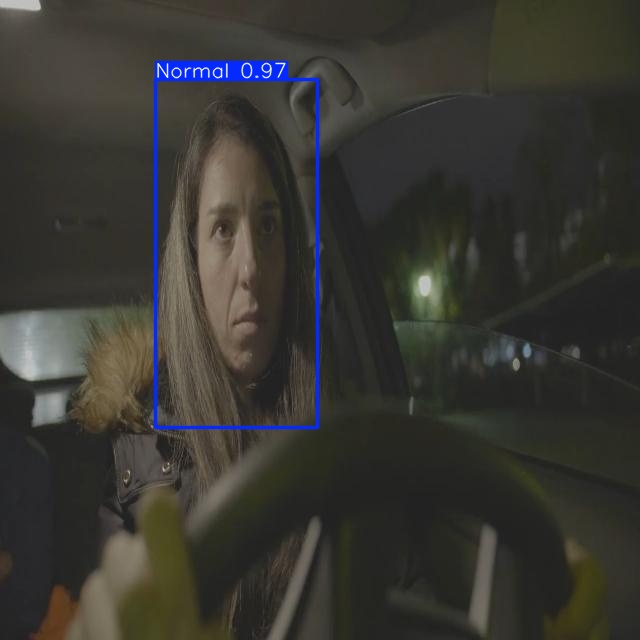

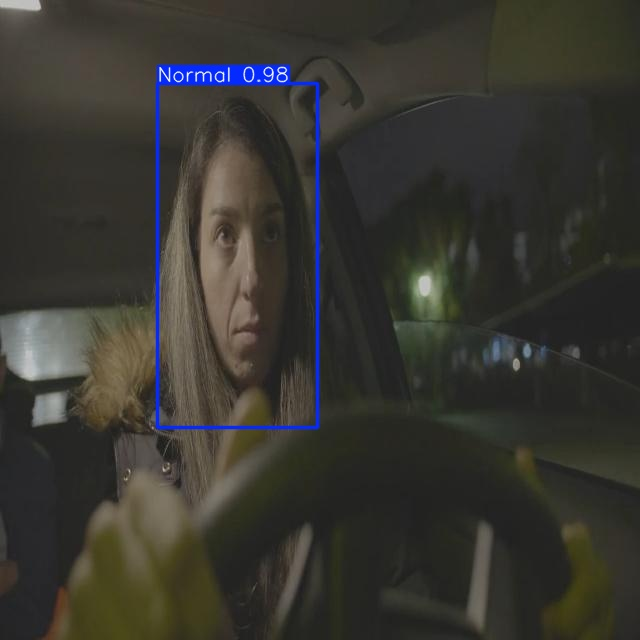

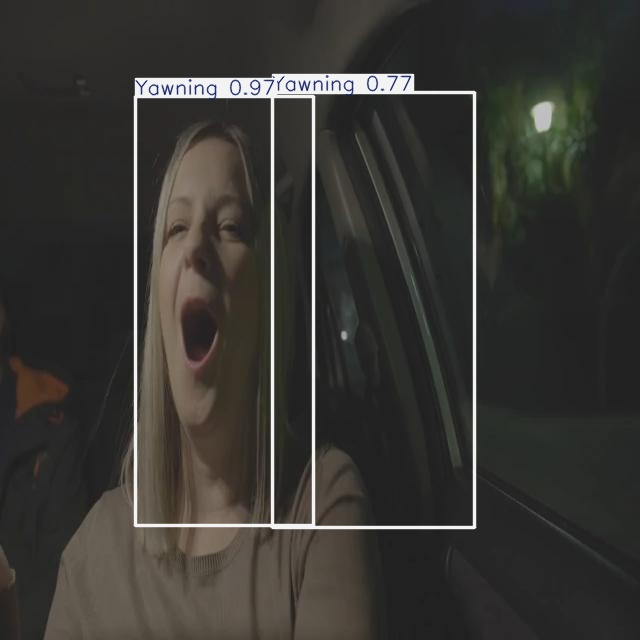

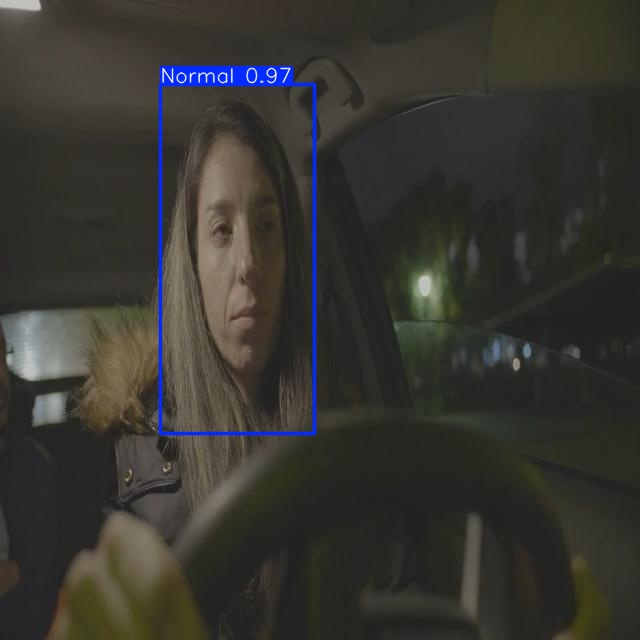

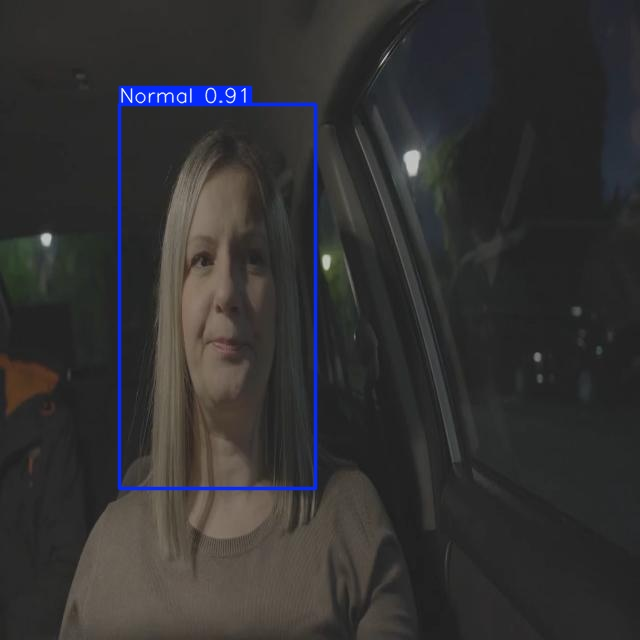

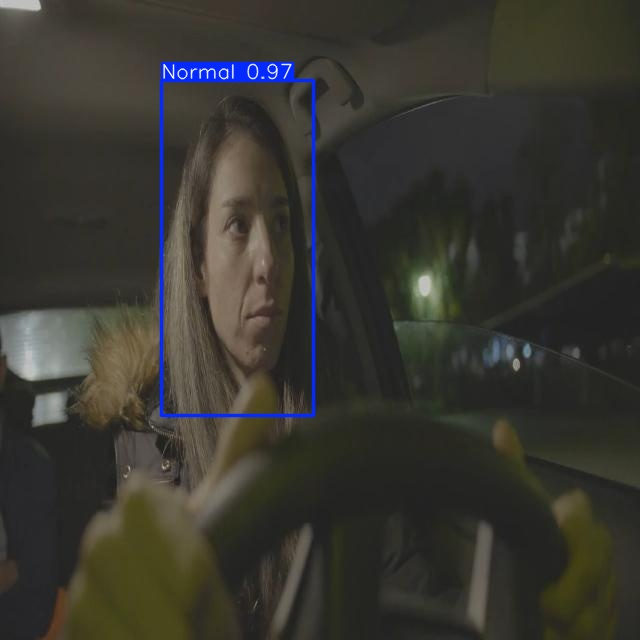

In [ ]:
import glob
from IPython.display import Image, display

# Loop through the first three image paths in the specified directory
for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")  # This will add a new line after each image